# EDA Arbol de decision

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from pickle import dump

In [3]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print("la base de datos tiene 768 filas y 9 columnas. Todas las columnas son numericas")

la base de datos tiene 768 filas y 9 columnas. Todas las columnas son numericas


In [7]:
#DUPLICADOS

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

print("No existen datos duplicados")

0
No existen datos duplicados


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#INFORMACION DE CADA COLUMNA y ELIMINACION DE COLUMNAS IRRELEVANTES

df.drop(["SkinThickness"], axis=1, inplace=True)


df.Glucose.value_counts()
#df.BloodPressure.value_counts()
#df.SkinThickness.value_counts()
#df.Insulin.value_counts()
#df.BMI.value_counts()
#df.DiabetesPedigreeFunction.value_counts()

df.head()


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


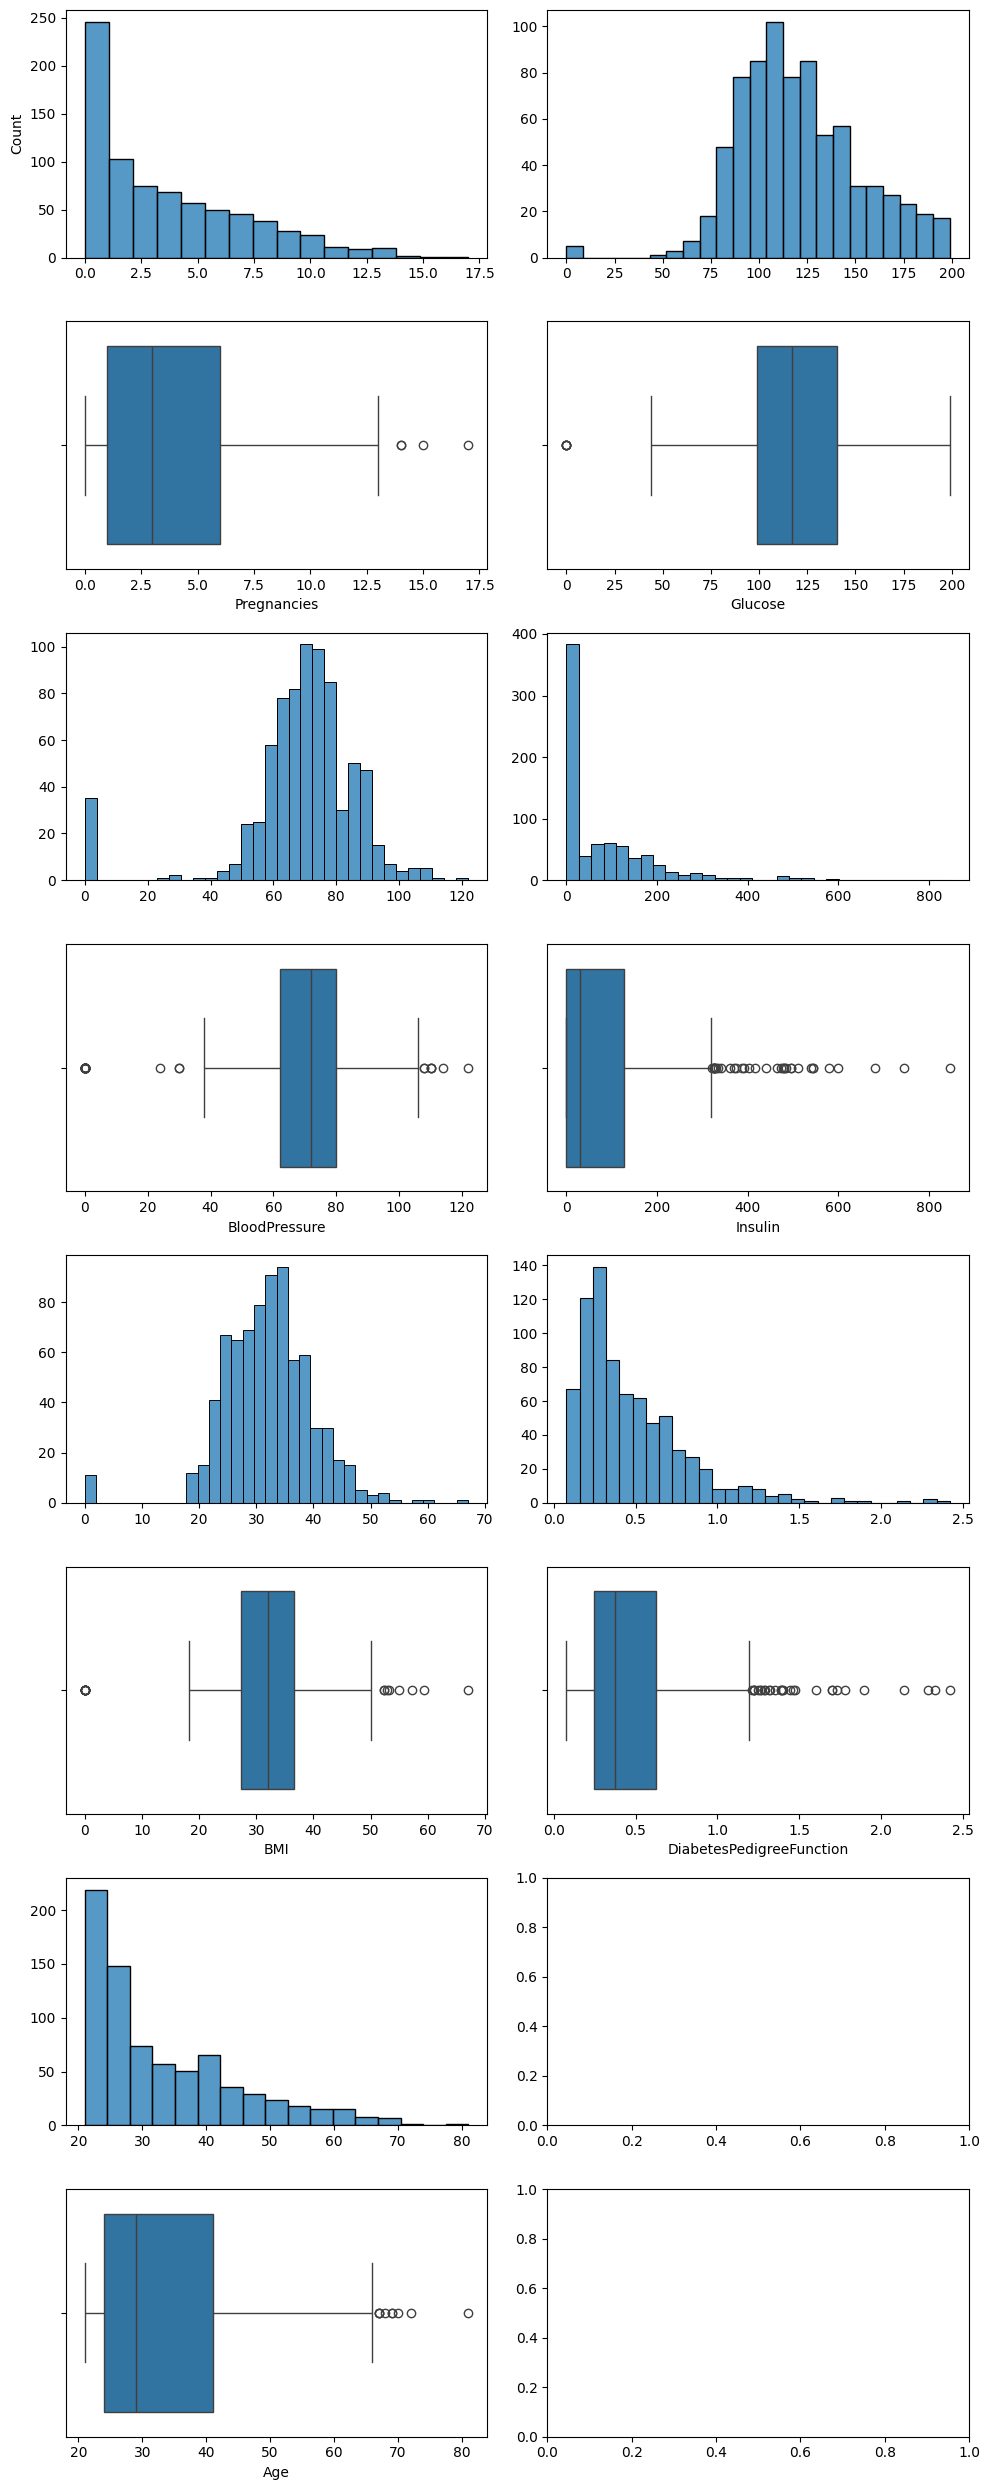

Todas la variables tienen outliers; por lo que se procede a eliminarlos.


In [10]:
#ANALISIS UNIVARIANTE

fig, axes = plt.subplots(8, 2, figsize=(10, 25), gridspec_kw={'height_ratios': [1]*8})

sns.histplot(ax=axes[0, 0], data=df, x= "Pregnancies").set(xlabel=None)
sns.boxplot(ax=axes[1, 0], data=df, x= "Pregnancies")

sns.histplot(ax=axes[0, 1], data=df, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 1], data=df, x="Glucose")

sns.histplot(ax=axes[2, 0], data=df, x="BloodPressure").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 0], data=df, x="BloodPressure")

sns.histplot(ax=axes[2, 1], data=df, x="Insulin").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 1], data=df, x="Insulin")

sns.histplot(ax=axes[4, 0], data=df, x="BMI").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 0], data=df, x="BMI")

sns.histplot(ax=axes[4, 1], data=df, x="DiabetesPedigreeFunction").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 1], data=df, x="DiabetesPedigreeFunction")

sns.histplot(ax=axes[6, 0], data=df, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[7, 0], data=df, x="Age")


plt.tight_layout()
plt.show()

print("Todas la variables tienen outliers; por lo que se procede a eliminarlos.")

In [11]:
# ELIMINACION DE OUTLIERS

# Glucose - Filtrar valores de Glucosa (67 a 200)
glu_so = (df['Glucose'] >= 67) & (df['Glucose'] <= 200)

#BlodPressure
# Filtrar valores de BlodPresure (55 a 120)
bp_so = (df['BloodPressure'] >= 55) & (df['BloodPressure'] <= 120)

#Insulin
# Filtrar valores de Insulin (5 a 200)
i_so = (df['Insulin'] >= 5) & (df['Insulin'] <= 200)

#BMI
# Filtrar valores de BMI (18 a 45)
bmi_so = (df['BMI'] >= 18) & (df['BMI'] <= 45)

# Aplicar ambos filtros al dataframe
df_filtrado = df[glu_so & bp_so & i_so & bmi_so]

df_filtrado.shape

(262, 8)

Se establecen los limites de bmi y Charges para eliminar los outliers de acuerdo a la observacion de la tabla de estadistica descriptiva
Se crea un dataframe adicional con las variables sin outliers.
Finalmente no se considera usar el df con limites de los outliers porque afecta al resultado del modelo de regresion elegido


In [12]:
#Base de datos sin Outliers de variables criticas
df_filtrado.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
14,5,166,72,175,25.8,0.587,51,1
19,1,115,70,96,34.6,0.529,32,1
24,11,143,94,146,36.6,0.254,51,1
25,10,125,70,115,31.1,0.205,41,1


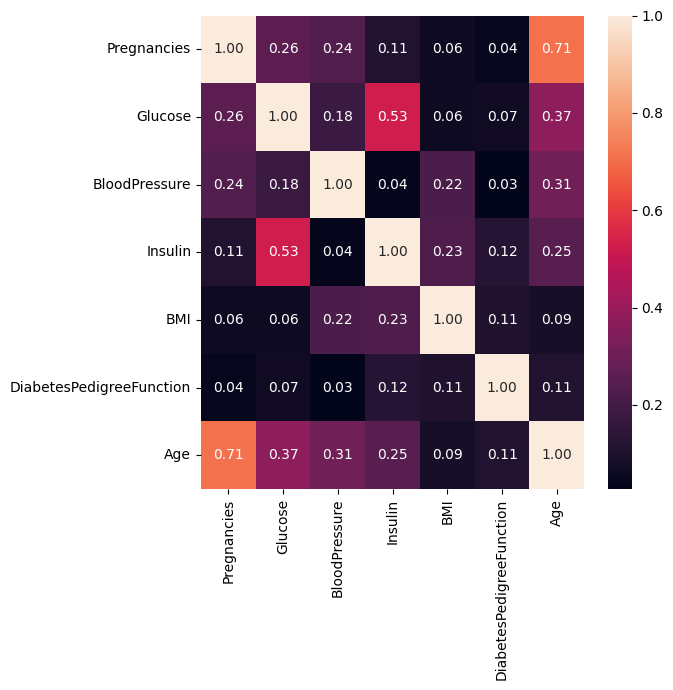

In [13]:
# Mapa de Calor 

fig, axes = plt.subplots(figsize = (7, 7))

sns.heatmap(df_filtrado[["Pregnancies",	"Glucose", "BloodPressure",	"Insulin",	"BMI", "DiabetesPedigreeFunction",	"Age"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El mapa de calor muestra una correlacion entre glucosa e insulina, asi como embarazo y edad. No se observa mas correlacion en el resto de variables

ARBOL DE DECISION

In [14]:
#SE DIVIDEN LOS DATOS

X = df_filtrado.drop("Outcome", axis = 1)
y = df_filtrado["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()    

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
532,1,86,66,65,41.3,0.917,29
353,1,90,62,43,27.2,0.580,24
306,10,161,68,132,25.5,0.326,47
692,2,121,70,95,39.1,0.886,23
203,2,99,70,44,20.4,0.235,27


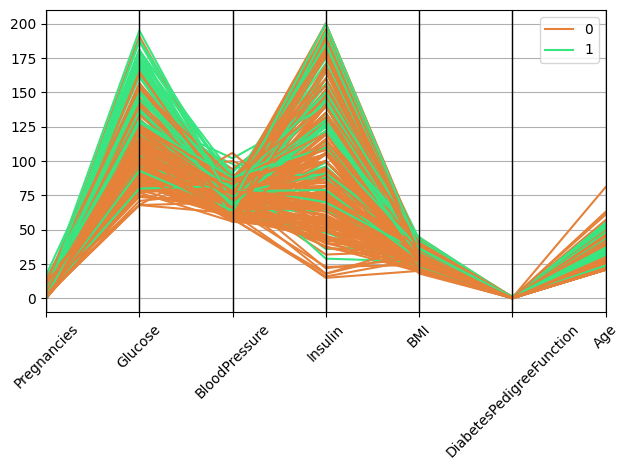

In [15]:
total_data = X
total_data["df_filtrado"] = y

pd.plotting.parallel_coordinates(total_data, "df_filtrado", color = ("#E58139", "#39E581"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#MODELADO Y ENTRENAMIENTO CON VARIOS HIPERPARAMETROS PARA DETERMINAR EL MEJOR

In [46]:
# MODELADO y ENTRENAMIENTO CON VARIOS HIPERPARAMETROS

#Modelado con varios hiperparametros
model = DecisionTreeClassifier(random_state = 42)

varios_hiperparametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=varios_hiperparametros,
    cv=5,               # validación cruzada de 5 particiones
    scoring='accuracy', # métrica de evaluación en vez del gini 
    n_jobs=-1,          # usa todos los núcleos del CPU
    verbose=1
)

# entrenamiento
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("Mejor Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor Accuracy: 0.7612078977932637


MODELADO Y ENTRENAMIENTO CON LOS MEJORES HIPERPARAMETROS

In [ ]:
#Modelado 

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=3, min_samples_leaf=1, min_samples_split=2)     


# entrenamiento
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


VISUALIZACION DEL ARBOL CON LOS MEJORES HIPERPARAMETROS

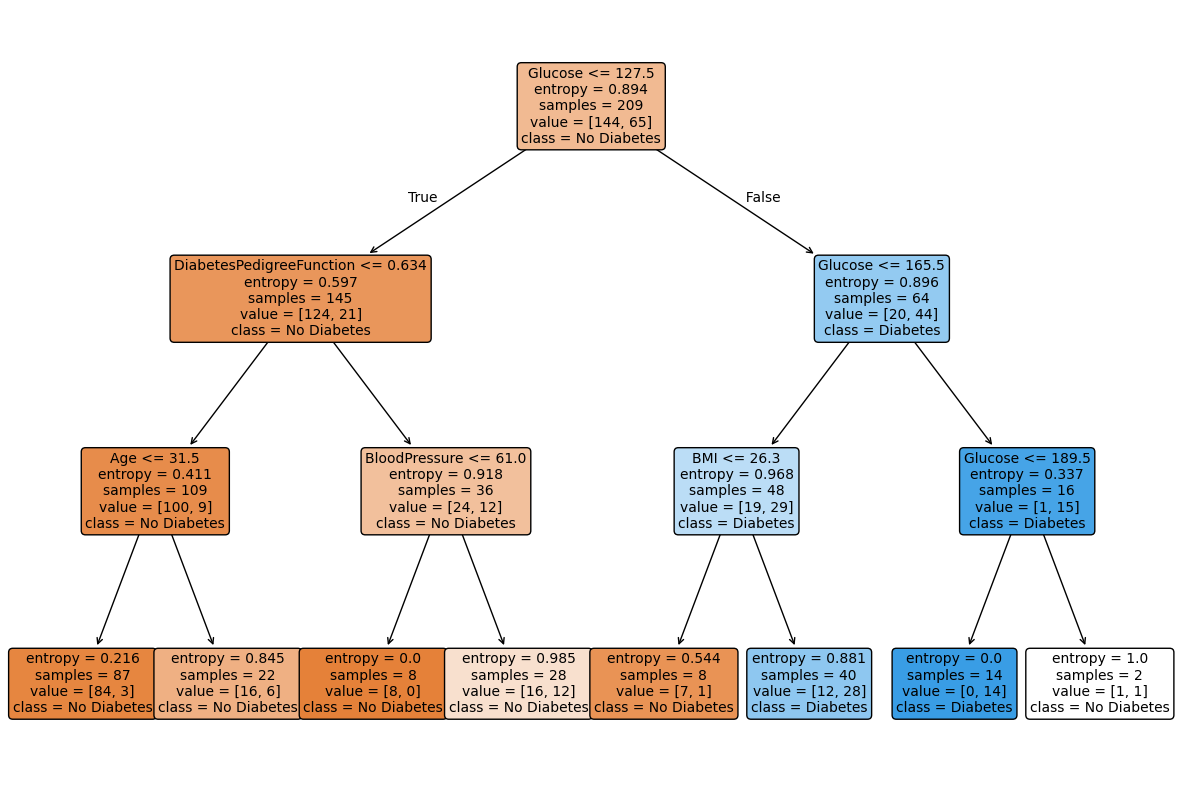

In [37]:
#VISUALIZACION DEL ARBOL 

fig = plt.figure(figsize=(15, 10))

tree.plot_tree(model,feature_names=list(X_train.columns),class_names=["No Diabetes", "Diabetes"], filled=True,rounded=True, fontsize=10)

plt.show()


In [43]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0])

In [44]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8301886792452831
F1 score Test:  0.8301886792452831
Precision Test:  0.8301886792452831
Recall Test:  0.8301886792452831
Accuracy Train:  0.8325358851674641
F1 score Train:  0.8325358851674641
Precision Train:  0.8325358851674641
Recall Train:  0.8325358851674641


In [45]:
print(classification_report(y_test, y_pred_test, target_names=["Diabetes","No Diabetes"]))

              precision    recall  f1-score   support

    Diabetes       0.95      0.85      0.90        47
 No Diabetes       0.36      0.67      0.47         6

    accuracy                           0.83        53
   macro avg       0.66      0.76      0.68        53
weighted avg       0.89      0.83      0.85        53



In [48]:
#Se guarda el modelo
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

# CONCLUSION

- El modelo acierta con un 83% en un accuracy test
- En relación a las variables, existe una precision de 95% en predecir la diabetes, pero un 36% de precision en predecir los casos de no diabetes
- La clase No diabetes es minoritaria, por lo que puede generar errores en el modelo
